# **FLICKFLARE**











### **Project Phase 4**

Authors

#### Kelvin Mwaura
#### Abigael Nyabaga
#### Prossy Nansubuga

FlickFlare Movie Recommender System

Overview:

FlickFlare is an innovative movie streaming platform  that aims to deliver a diverse array of movies nad films, ranging from classic cinema and indie gems to the latest blockbusters, directly to your screen. To elevate user satisfaction, increase watch time, and improve customer retention, FlickFlare is implementing a sophisticated movie recommendation system. This system will utilize the MovieLens dataset to create a hybrid recommendation engine that provides personalized top 5 movie suggestions for each user based on their previous ratings and preferences.

By using collaborative filtering techniques , FlickFlare ensures precise and relevant movie recommendations. This personalized approach aims to reduce content discovery friction, boost average watch time per user by suggesting highly relevant content, and improve customer retention rates through a tailored viewing experience. Additionally, this strategy helps FlickFlare differentiate itself from competitors in the streaming market by offering superior content curation and optimizing content acquisition and production strategies based on user preferences.

This project aligns with FlickFlare's broader goal of leveraging data-driven insights to create a more compelling and personalized streaming service, ultimately driving business growth and solidifying its position as a leader in the competitive streaming industry.

Business Understanding
 Problem Statement


FlickFlare, a prominent movie streaming platform, faces a critical challenge:

• User feedback on Google Play Store indicates dissatisfaction with movie recommendations

• Current suggestions fail to align with user interests and preferences

• This misalignment is impacting user engagement and retention of customers on the platform, leading to a 25% increase in churn rates over the past six months. 


 FlickFlare has partnered with RODATA, a data analytics firm, to address this issue by Developing a sophisticated movie recommender system that provides personalized  movie recommendations based off individual user ratings and preferred genres.
 This tailored solution aims to transform FlickFlare's recommendation engine, directly addressing user concerns and boosting overall platform performance.

 Objectives

 Main Objective

To build a movie recommender system that suggests top movies to streaming users based on movie ratings

Specific Objectives

1. To Implement and compare SVD, NMF, and KNN collaborative filtering algorithms for movie recommendation, evaluating their performance using RMSE on a benchmark dataset of user-movie ratings

2. To use the model witn the lowest rmse  to generate personalized top-N movie recommendations for streaming users.

3.To develop a hybrid recommender system that combines the strengths of SVD, NMF, and KNN models to potentially improve upon the performance of the best single model





Metric for Success




Goal: To Achieve at least 80% accuracy in recommending the top five movies.

Approach:

Model Implementation: To Utilize SVD, NMF, and KNN algorithms to predict user ratings and rank movies accordingly.

Evaluation: Measure the accuracy of predictions using RMSE . The goal is to achieve an RMSE that corresponds to at least 80% accuracy in the top five recommendations.

Optimization: Continuously tune and validate model parameters to improve accuracy. W e will Use techniques like cross-validation to ensure the robustness of the models

DATA CONSTRAINTS 

1. Sparsity of the data : Many users rate only a few movies, resulting in a sparse ratings matrix. This makes it challenging to find commonalities between users or movies for collaborative filtering.

2. Cold start problem: Difficulty in recommending to new users or items with no rating history.

3. Bias in Data: Historical data may contain biases, such as popular movies receiving more ratings. These biases can skew recommendations towards already popular items, limiting diversity.

4. Demographic skew: The Dataset may not represent all user groups equally, leading to biased recommendations

5. Ensuring there is  a  balance between accuracy and diversity ie offering precise recommendations while at the same time offering a diverse range of options to avoid monotony and  boredom to the users.

Data Understanding

The data used has been sourced from the MovieLens dataset from the GroupLens research lab at the University of Minnesota.

It contains 100,836 ratings and 3,683 tag applications across 9,742 movies. These data were created by 610 users.

The dataset is distributed among four CSV files:

    links.csv
    movies.csv
    ratings.csv
    tags.csv

1. **movies.csv**

Each line of this file after the header row represents one movie and has the following columns:

    movieId: Unique ID for each movie
    title: Name of the movie followed by its year of release
    genres: Categories that a movie might fall into, separated by |



2. **tags.csv**

Each line of this file after the header row represents one tag applied to one movie by one user and has the following columns:

    userId: Unique ID for each user
    movieId: Unique ID for each movie
    tag: User-generated metadata about the movie in the form of short, meaningful phrases
    timestamp: Time when the tag was provided by the user

3. **ratings.csv**

Each line of this file after the header row represents one rating and has the following columns:

    userId: Unique ID for each user
    movieId: Unique ID for each movie
    rating: Rating given by the user for the movie. Ratings are made on a 5-star scale with 0.5 increments
    timestamp: Time when the rating was given

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the different datasets into pandas DataFrames
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')


# Displaying the first few rows of each DataFrame to confirm successful loading
print("Tags DataFrame:")
print(tags_df.head())

print("\nMovies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())



In [ ]:
# printing the number of records in every dataframe
dataframes = [ movies_df, ratings_df, tags_df]
dataframe_names = [ 'movies_df', 'ratings_df', 'tags_df']

for i in range(len(dataframes)):
    print(f" {dataframe_names[i]} has {dataframes[i].shape[0]} records.")

 movies_df has 9742 records.
 ratings_df has 100836 records.
 tags_df has 3683 records.


### **Inspect and Handle Missing Values**

    Check for Missing Values: We will determine if there are any missing values in the DataFrames.

In [ ]:
print("Missing values in tags_df:")
print(tags_df.isnull().sum())

print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())

print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())




Missing values in tags_df:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in movies_df:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings_df:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


### **Review Missing Data:**

**Implications of Missing tmdbId Values:**

1. **Data Integrity:** The missing tmdbId values mean that there are some records where the unique identifier for movies is absent. This can lead to incomplete information when attempting to link or fetch movie details.

2. **Potential Issues in Analysis:** If we need to perform operations like merging with other datasets that use tmdbId, these records will not match and may result in missing data or errors in your analysis.

3. **Impact on Model Training:** For machine learning models or recommendations, missing identifiers can lead to incomplete data for feature engineering, which can affect model performance and accuracy.

**Steps Taken to Handle Missing Values:**

1. Identified Missing Records:
2. Dropping Rows with Missing tmdbId

In [ ]:
# Check for any remaining missing values in all DataFrames
print("\nMissing values in tags_df:")
print(tags_df.isnull().sum())

print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())

print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())





Missing values in tags_df:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in movies_df:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings_df:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [ ]:
# Check for duplicates in all DataFrames
print("\nDuplicates in tags_df:")
print(tags_df.duplicated().sum())

print("\nDuplicates in movies_df:")
print(movies_df.duplicated().sum())

print("\nDuplicates in ratings_df:")
print(ratings_df.duplicated().sum())



# Remove duplicates if found
tags_df.drop_duplicates(inplace=True)
movies_df.drop_duplicates(inplace=True)
ratings_df.drop_duplicates(inplace=True)




Duplicates in tags_df:
0

Duplicates in movies_df:
0

Duplicates in ratings_df:
0


In [ ]:
# Genre Processing: Split the genres in the `movies.csv` dataset into lists for easier analysis

movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split('|'))
movies_df

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


**Convert timestamp into datetime object**

Purpose: Converts timestamps from Unix epoch time (seconds since 1970-01-01) to datetime objects.

Parameter unit='s': Specifies that the timestamps are in seconds. If your timestamps are in milliseconds, you would use unit='ms'.

The function below is designed to convert timestamp values into datetime objects, which is useful for time-based analysis.

In [ ]:


# Convert timestamps to datetime
tags_df['timestamp'] = pd.to_datetime(tags_df['timestamp'], unit='s')
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')



**Join DataFrames**

We shall now join movies_df with tags_df and ratings_df, and include links_df:

In [ ]:
# Join movies_df with tags_df on 'movieId'
movies_tags_df = pd.merge(movies_df, tags_df, on='movieId', how='left')

# Join movies_df with ratings_df on 'movieId'
movies_ratings_df = pd.merge(movies_df, ratings_df, on='movieId', how='left')



# Print shapes and sample data for verification
print("\nMovies and Tags DataFrame:")
print(movies_tags_df.head())
print("\nMovies and Ratings DataFrame:")
print(movies_ratings_df.head())





Movies and Tags DataFrame:
   movieId             title  \
0        1  Toy Story (1995)   
1        1  Toy Story (1995)   
2        1  Toy Story (1995)   
3        2    Jumanji (1995)   
4        2    Jumanji (1995)   

                                              genres  userId  \
0  [Adventure, Animation, Children, Comedy, Fantasy]   336.0   
1  [Adventure, Animation, Children, Comedy, Fantasy]   474.0   
2  [Adventure, Animation, Children, Comedy, Fantasy]   567.0   
3                     [Adventure, Children, Fantasy]    62.0   
4                     [Adventure, Children, Fantasy]    62.0   

                tag           timestamp  
0             pixar 2006-02-04 09:36:04  
1             pixar 2006-01-14 02:47:05  
2               fun 2018-05-02 18:33:33  
3           fantasy 2018-06-12 22:52:09  
4  magic board game 2018-06-12 22:52:12  

Movies and Ratings DataFrame:
   movieId             title  \
0        1  Toy Story (1995)   
1        1  Toy Story (1995)   
2        1  Toy

we'll drop the tag column  from the tag df due to the following reasons;

Tags are sparse and inconsistently used. For instance, in our case  only a small subset of movies have tags and the rest don't, it might be challenging to use this feature effectively in our model.

Tags are already represented in other features (e.g., genres), including them might introduce redundancy. 

Since the tags are user-generated, they bring in noise  and inconsistent information, which might not contribute positively to the recommender system.




In [ ]:
# Drop the 'tags' column
tags_df_dropped = movies_tags_df.drop(columns=['tag', 'userId'])

# Display the modified DataFrame
tags_df_dropped

,movieId,title,genres,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",2006-02-04 09:36:04
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",2006-01-14 02:47:05
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",2018-05-02 18:33:33
3,2,Jumanji (1995),"[Adventure, Children, Fantasy]",2018-06-12 22:52:09
4,2,Jumanji (1995),"[Adventure, Children, Fantasy]",2018-06-12 22:52:12
...,...,...,...,...
11848,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",NaT
11849,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",NaT
11850,193585,Flint (2017),[Drama],NaT
11851,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",NaT


we'll also drop the timestamp column from the movies tag due to the following reasons  

The timestamp might lead to overfitting if the model starts to consider time-based patterns that aren't generalizable across different time periods or user behavior.


since we'll be making a content-based recommendation systems, the focus is on item attributes (like genre, description) rather than the timing of interactions. The timestamp is less relevant in this case 

In [ ]:
# Remove the 'timestamp' column from movies_ratings_df
movies_ratings_df_dropped = movies_ratings_df.drop(columns=['timestamp'])

# Remove the 'timestamp' column from tags_df_dropped (assuming it's there)
# If tags_df_dropped doesn't have a 'timestamp' column, this operation will be harmless
tags_df_dropped = tags_df_dropped.drop(columns=['timestamp'], errors='ignore')

# Display the modified DataFrames to confirm the columns are removed
print("Modified movies_ratings_df:")
print(movies_ratings_df_dropped.head())

print("\nModified tags_df_dropped:")
print(tags_df_dropped.head())


Modified movies_ratings_df:
   movieId             title  \
0        1  Toy Story (1995)   
1        1  Toy Story (1995)   
2        1  Toy Story (1995)   
3        1  Toy Story (1995)   
4        1  Toy Story (1995)   

                                              genres  userId  rating  
0  [Adventure, Animation, Children, Comedy, Fantasy]     1.0     4.0  
1  [Adventure, Animation, Children, Comedy, Fantasy]     5.0     4.0  
2  [Adventure, Animation, Children, Comedy, Fantasy]     7.0     4.5  
3  [Adventure, Animation, Children, Comedy, Fantasy]    15.0     2.5  
4  [Adventure, Animation, Children, Comedy, Fantasy]    17.0     4.5  

Modified tags_df_dropped:
   movieId             title  \
0        1  Toy Story (1995)   
1        1  Toy Story (1995)   
2        1  Toy Story (1995)   
3        2    Jumanji (1995)   
4        2    Jumanji (1995)   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1  [Adventure, Animatio

In [ ]:
#This approach ensures that all relevant data from tags_df, ratings_df, is included in final_df, without duplicating columns like movieId, title, and genre.


# Drop the unnecessary columns from movies_ratings_df
movies_ratings_df_filtered = movies_ratings_df_dropped.drop(columns=['movieId', 'title', 'genres'])

# Concatenate movies_tags_df and the filtered movies_ratings_df
final_df = pd.concat([tags_df_dropped, movies_ratings_df_filtered], axis=1)

# Display the final DataFrame
final_df


,movieId,title,genres,userId,rating
0,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,4.0
1,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5.0,4.0
2,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7.0,4.5
3,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",15.0,2.5
4,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",17.0,4.5
...,...,...,...,...,...
100849,NaN,NaN,NaN,184.0,4.0
100850,NaN,NaN,NaN,184.0,3.5
100851,NaN,NaN,NaN,184.0,3.5
100852,NaN,NaN,NaN,184.0,3.5


### **Exploratory Data Analysis (EDA):**
Conduct EDA to understand distributions and relationships in your data.


**Handling Outliers**

To gain deeper insights into our movie dataset, we can extend our analysis to consider outliers in the number of ratings each movie has received. By identifying movies that have an unusually high or low number of ratings, we can uncover patterns related to their popularity. This analysis helps us pinpoint movies that either stand out as exceptionally popular or are less frequently rated, providing valuable information for refining our recommendation system and enhancing user satisfaction.

**Purpose of the Analysis:**
to identify outliers in the number of ratings each movie has received. This helps understand which movies are unusually popular or less frequently rated.

First we will check for outliers in the ratings of  the movies.

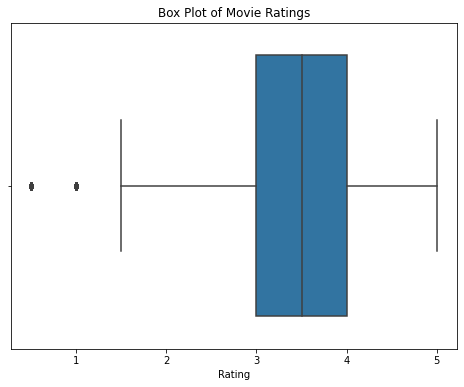

In [ ]:


# Plotting box plot to check for outliers in ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', data=ratings_df)
plt.title('Box Plot of Movie Ratings')
plt.xlabel('Rating')
plt.show()

This indicates the presence of outliers in our ratings dataset, specifically with ratings between 0 and 1.5. We will investigate this further by focusing on the ratings for a specific movie and examining the outliers in those ratings.

In [ ]:
# Calculate the number of ratings each movie has received
movie_rating_counts = ratings_df['movieId'].value_counts().reset_index()
movie_rating_counts.columns = ['movieId', 'rating_count']

# Merge with movies_df to get movie titles
movies_with_counts = pd.merge(movies_df, movie_rating_counts, on='movieId')

# Display the first few rows
print(movies_with_counts.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  rating_count  
0  [Adventure, Animation, Children, Comedy, Fantasy]           215  
1                     [Adventure, Children, Fantasy]           110  
2                                  [Comedy, Romance]            52  
3                           [Comedy, Drama, Romance]             7  
4                                           [Comedy]            49  


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for rating counts
Q1 = movies_with_counts['rating_count'].quantile(0.25)
Q3 = movies_with_counts['rating_count'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = movies_with_counts[(movies_with_counts['rating_count'] < lower_bound) | (movies_with_counts['rating_count'] > upper_bound)]
non_outliers = movies_with_counts[(movies_with_counts['rating_count'] >= lower_bound) & (movies_with_counts['rating_count'] <= upper_bound)]

# Count the number of outliers and non-outliers
outlier_count = len(outliers)
non_outlier_count = len(non_outliers)

print(f"Number of outliers: {outlier_count}")
print(f"Number of non-outliers: {non_outlier_count}")

Number of outliers: 1179
Number of non-outliers: 8545


This shows the presence of outliers in our movies_with_counts dataset.

While the majority of movie ratings are within a normal range, there are a significant number of outliers, which are further illustrated in the bar graph.

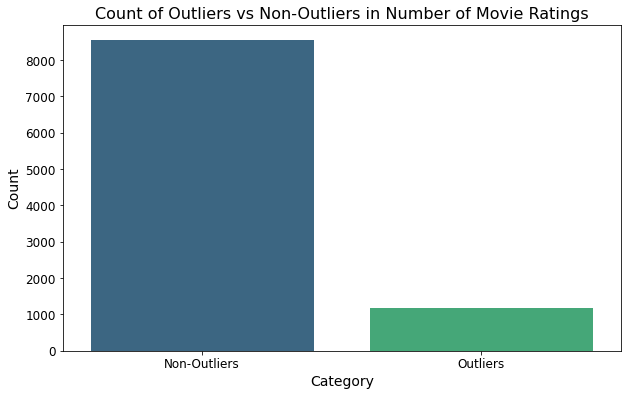

In [ ]:
# Data for the bar graph
data = {'Category': ['Non-Outliers', 'Outliers'], 'Count': [non_outlier_count, outlier_count]}

# Create DataFrame for the bar graph
outlier_df = pd.DataFrame(data)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=outlier_df, palette='viridis')
plt.title('Count of Outliers vs Non-Outliers in Number of Movie Ratings', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Our data contains outliers that we cannot remove due to their sensitivity and importance to our analysis. The graph above illustrates the distribution of ratings both with and without these outliers. The distributions appear to be only slightly different, indicating that removing the outliers may not be necessary.

**Univariate Analysis**

Our key features for univariate analysis:

genres: To analyze the distribution of different genres.

rating: To analyze the distribution of ratings given by users.

To analyze the top 10 movies based off the number of ratings from users

These columns are essential for univariate analysis as they provide valuable insights into the distribution and characteristics of genres,  and ratings within the dataset.

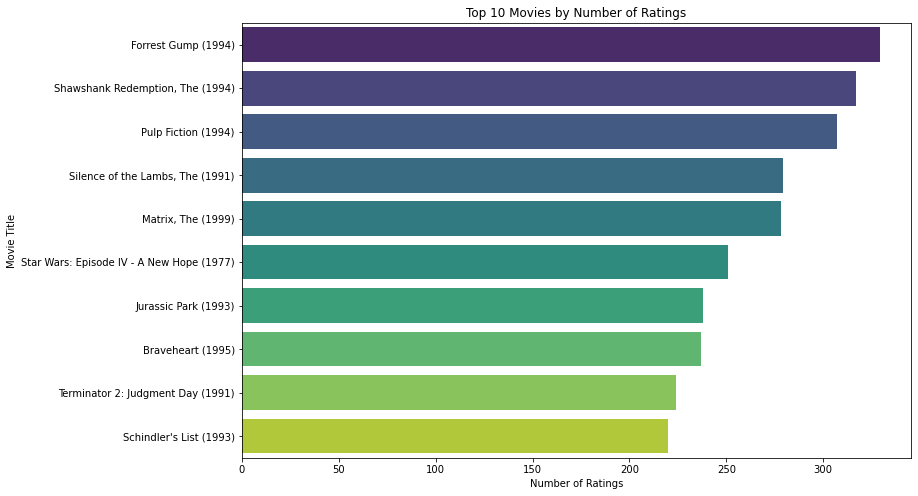

In [ ]:
# Group by movie title and count the number of ratings
movie_rating_counts = movies_ratings_df.groupby('title').size().reset_index(name='count')

# Sort movies by the count of ratings in descending order
sorted_movies = movie_rating_counts.sort_values(by='count', ascending=False)

# : Limit to the top 10 movies based on rating counts
top_10_movies = sorted_movies.head(10)

# Step 4: Plot the top 10 movies by rating count
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='title', data=top_10_movies, palette='viridis')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Number of Ratings')
plt.show()

The visualisation above shows the top 10 movies as per the number of ratings by the users with Forest Gump, Shawshank Reddemption and Pulp Fiction having the most amount of ratings

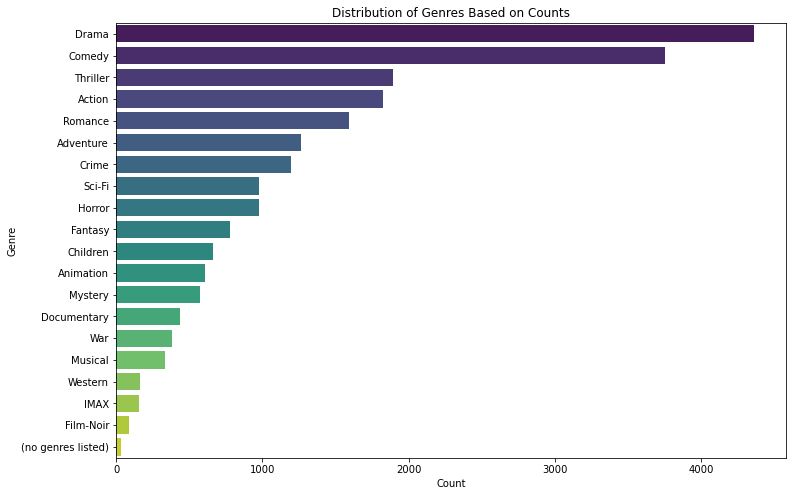

In [ ]:


#  Flatten the lists of genres
genres_flat = movies_df['genres'].explode().reset_index(drop=True)

# Convert to DataFrame and name the column
genres_df = genres_flat.to_frame(name='genre')

#  Count the occurrences of each genre
genre_counts = genres_df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

#  Sort genres by count in descending order
genre_counts_sorted = genre_counts.sort_values(by='count', ascending=False)

# Create a bar plot to show the distribution of genres
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='genre', data=genre_counts_sorted, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Genres Based on Counts')
plt.show()


The genre with the highest number of movies produced is the 'Drama' gener which suggests that it is likely the most watched genre.

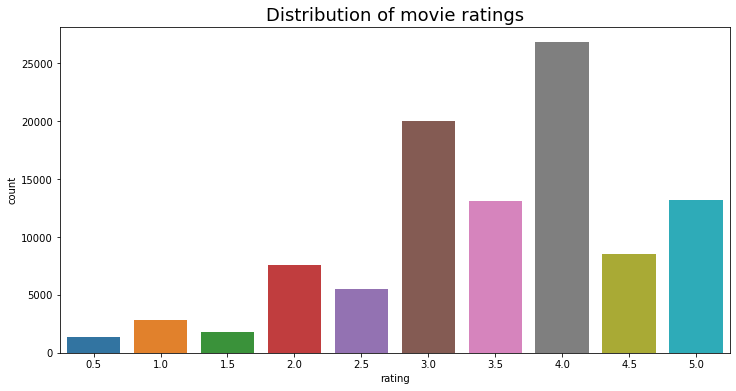

In [ ]:


# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create the countplot
sns.countplot(x='rating', data=ratings_df)

# Set the title with a larger font size
plt.title("Distribution of movie ratings", fontsize=18)

# Show the plot
plt.show()


The most common rating is 4.0 stars, with around 27,000 movies receiving this rating.

The second most common rating is 3.0 stars, with approximately 20,000 movies.

There's a general trend of ratings increasing from 0.5 to 4.0 stars, then decreasing for 4.5 and 5.0 stars.

Very low ratings (0.5 and 1.0 stars) are relatively uncommon, with fewer than 5,000 movies for each.

Bivariate Analysis

1. Ratings vs. Genre:

we will  analyze how ratings distribute across different movie genres and identify which genres tend to receive higher or lower ratings.

2. visualize the top ten movies: 

This is done by grouping movies according to their ratings and comparing movie title of top rated movies ie.with a rating of 5, against the number of ratings it was given

3. Create a correlation matrix: 

To show the correlation between movie genres. This would be useful in recommending a different genre of movies to a person if the movie genres have a high positive correlation.


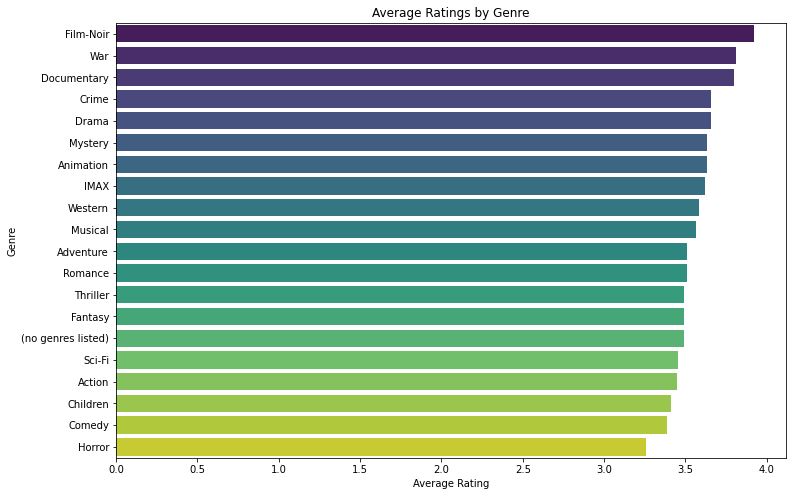

In [ ]:


#  Flatten the lists of genres
genres_flat = movies_df[['movieId', 'genres']].explode('genres')

#  Merge with ratings data
genres_ratings = pd.merge(genres_flat, ratings_df, on='movieId', how='left')

#  Aggregate ratings by genre
genre_ratings = genres_ratings.groupby('genres')['rating'].agg(['mean', 'count']).reset_index()
genre_ratings.columns = ['genre', 'average_rating', 'rating_count']

#  Create a bar plot to show average ratings by genre
plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y='genre', data=genre_ratings.sort_values(by='average_rating', ascending=False), palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Ratings by Genre')
plt.show()




This chart shows the average rating for each movie genre on a scale from 0 to 4.


Film-Noir has the highest average rating, followed closely by War and Documentary.

Horror and Comedy have the lowest average ratings.

Most genres have average ratings between 3.0 and 3.5.

There's not a huge variation in average ratings across genres, with all falling between about 3.0 and 3.8.

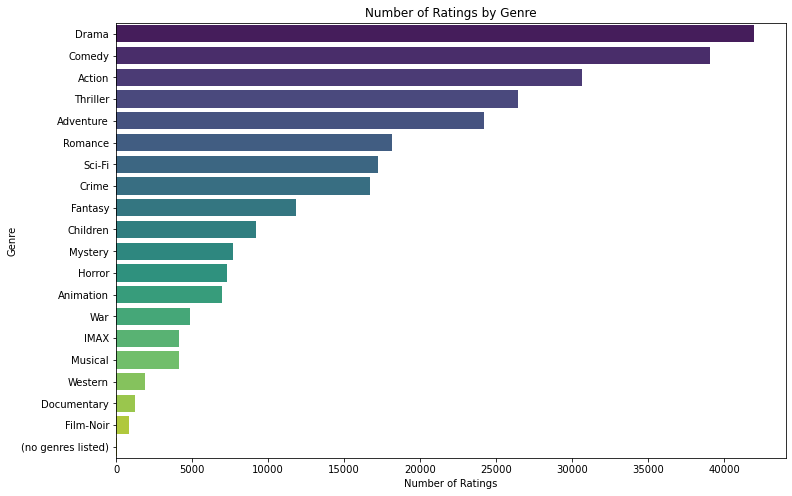

In [ ]:
#  Create a bar plot to show the number of ratings per genre
plt.figure(figsize=(12, 8))
sns.barplot(x='rating_count', y='genre', data=genre_ratings.sort_values(by='rating_count', ascending=False), palette='viridis')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.title('Number of Ratings by Genre')
plt.show()

This chart displays the total number of ratings each genre has received.

Drama is by far the most rated genre, followed by Comedy and Action.

Film-Noir, Documentary, and Western are among the least rated genres.

There's a significant disparity in the number of ratings across genres, ranging from tens of thousands for popular genres to just a few thousand for less common ones

Insight from the two visualisations: 

 Some genres with fewer ratings (like Film-Noir and War) have higher average ratings, while more frequently rated genres (like Comedy) have lower average ratings. This could suggest that niche genres attract more dedicated fans who rate them highly.

 The high number of ratings for Drama, Comedy, and Action suggests these are popular genres, but their average ratings are not the highest. This could indicate a more diverse audience with varying opinions.

 Genres like Documentary and War have high average ratings but fewer total ratings, suggesting they may have a smaller but more appreciative audience.

  Genres with high ratings but fewer total ratings (like Film-Noir) might be good candidates for recommendations to users who haven't explored them yet.

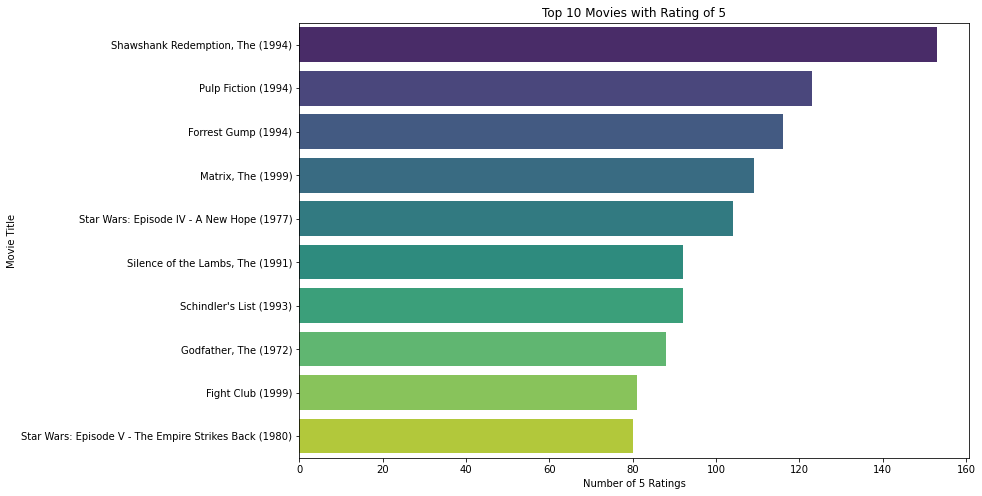

In [ ]:
# Filter movies with a rating of 5
top_rated_movies = movies_ratings_df[movies_ratings_df['rating'] == 5]

# Group by movie title and count the number of occurrences
top_rated_movies_counts = top_rated_movies.groupby('title').size().reset_index(name='count')

# Sort movies by count in descending order
top_rated_movies_sorted = top_rated_movies_counts.sort_values(by='count', ascending=False)

# Limit to top 10 movies
top_10_rated_movies = top_rated_movies_sorted.head(10)

# Plot the top 10 movies with a rating of 5
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='title', data=top_10_rated_movies, palette='viridis')
plt.xlabel('Number of 5 Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with Rating of 5')
plt.show()

This chart displays the top 10 movies that have received a perfect rating of 5, ranked by the number of such ratings they've received. 

 "The Shawshank Redemption" (1994) has received the most 5-star ratings, with approximately 145 perfect scores.

 "Pulp Fiction" (1994) follows closely behind, with about 130 5-star ratings.

 The list includes a variety of genres, from drama (Shawshank Redemption, Schindler's List) to science fiction (The Matrix, Star Wars) to crime (Pulp Fiction, The Godfather).


 Two Star Wars movies appear on the list, showing the strength of this franchise among viewers who give perfect scores.

we use the correlation matrix to identify which genres are typically rated similarly by users. For example, if Action and Thriller have a high positive correlation, it might suggest that users who enjoy Action movies also enjoy Thrillers.

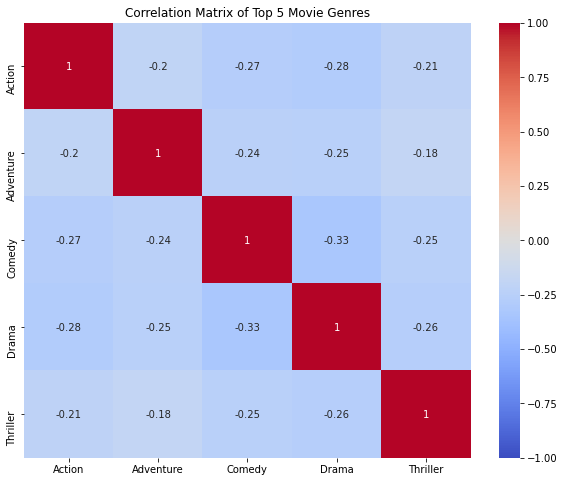

             Action  Adventure    Comedy     Drama  Thriller
Action     1.000000  -0.201811 -0.271647 -0.284852 -0.212955
Adventure -0.201811   1.000000 -0.235525 -0.246974 -0.184638
Comedy    -0.271647  -0.235525  1.000000 -0.332439 -0.248531
Drama     -0.284852  -0.246974 -0.332439  1.000000 -0.260612
Thriller  -0.212955  -0.184638 -0.248531 -0.260612  1.000000


In [ ]:



# Flatten the lists of genres
genres_flat = movies_df[['movieId', 'genres']].explode('genres')

# Merge with ratings data
genres_ratings = pd.merge(genres_flat, ratings_df, on='movieId', how='left')

# Aggregate ratings by genre
genre_ratings = genres_ratings.groupby('genres')['rating'].agg(['mean', 'count']).reset_index()
genre_ratings.columns = ['genre', 'average_rating', 'rating_count']

# Sort genres by rating count and select top 5
top_5_genres = genre_ratings.sort_values('rating_count', ascending=False).head(5)['genre'].tolist()

# Filter the original data for only the top 5 genres
top_5_genres_data = genres_ratings[genres_ratings['genres'].isin(top_5_genres)]

# Create dummy variables for the top 5 genres
genres_dummies = pd.get_dummies(top_5_genres_data['genres'])

# Combine with ratings
genres_dummies_with_ratings = pd.concat([genres_dummies, top_5_genres_data['rating']], axis=1)

# Calculate the correlation matrix
correlation_matrix = genres_dummies_with_ratings.corr()

# Remove the 'rating' row and column to focus on genre correlations
correlation_matrix_genres = correlation_matrix.iloc[:-1, :-1]

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_genres, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Top 5 Movie Genres')
plt.show()

# Print the correlation matrix
print(correlation_matrix_genres)

There seems to be a week negative and positive correlation between the top five. This implies that they do not influence each other's ratings. Users who like one genre are not necessarily inclined to like or dislike another genre. This might also mean that users have diverse tastes, and their preferences for different genres are not strongly linked.
For a recommendation system, weak correlations mean that recommending one genre based on another might not be very effective. For example, if Action and Romance have a weak correlation, suggesting a Romance movie to a user who likes Action movies may not be very effective.Hence the need to visualize user preferences.

DATA PREPROCESSING

We are going to use a technique called collaborative filtering to generate recommendations for users. This technique is based on the premise that similar people like similar things.

The first step is to transform our data into a user-item matrix, also known as a "utility" matrix. In this matrix, rows represent users and columns represent movies. The beauty of collaborative filtering is that it doesn't require any information about the users or the movies user to generate recommendations.


We will come up with a create_X() function which outputs a sparse matrix 
 with four mapper dictionaries:

user_mapper: maps user id to user index

movie_mapper: maps movie id to movie index

user_inv_mapper: maps user index to user id

movie_inv_mapper: maps movie index to movie id

We need these dictionaries because they map which row/column of the utility matrix corresponds to which user/movie id.

In [ ]:

from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    # Drop rows with NaN values in 'userId' or 'movieId'
    df = df.dropna(subset=['userId', 'movieId'])

    M = df['userId'].nunique()  # Number of user ID's
    N = df['movieId'].nunique()  # Number of movie ID's

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index, item_index)), shape=(M, N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(movies_ratings_df_dropped)


In [ ]:
X.shape #testing to see that the function is working

(610, 9724)

since we're making a collaborative filtering recommendation sysytem, Evaluating sparsity is very important

Here, we calculate sparsity by dividing the number of stored elements by total number of elements. The number of stored (non-empty) elements in our matrix (nnz) is equivalent to the number of ratings in our dataset.

Sparsity refers to the proportion of missing values in the user-item interaction matrix. A high sparsity level indicates that there are many missing values, meaning that users have interacted with only a small fraction of the available items.

Many recommendation algorithms perform poorly on sparse data because they rely on sufficient interactions to learn user preferences and item characteristics effectively. Sparse matrices can lead to overfitting, where the model might learn noise instead of actual patterns

Sparse data can make it challenging to recommend items to new users(the cold start problem) who have interacted with very few items, as there is little information to base recommendations on.

Similarly, it is difficult to recommend new items that have not been interacted with by many users.

if there are too many movies without ratings it is best to use content based filtering.

In [ ]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz  #checking for non null values in  the sparse matrix
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.7%


Given a sparsity level of 1.7%, collaborative filtering can still be used.


csr_matrix.nnz counts the stored values in our sparse matrix. The rest of our cells are empty.

The cold start problem is when there are new users and movies in our matrix that do not have any ratings.

 In our Movielens dataset, all users and movies have at least one rating but in general, it's useful to check which users and movies have few interactions

In [ ]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

610

In [ ]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 2698 movies.
Least active user rated 20 movies.


In [ ]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

9724

In [ ]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 329 ratings.
Least rated movie has 1 ratings.


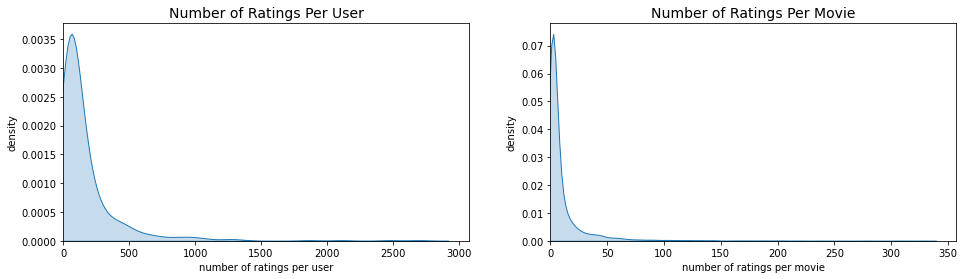

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

Both plots indicate a high level of sparsity in the dataset, as most movies have only a few ratings and most users have rated only a few movies.

High sparsity can pose challenges for collaborative filtering algorithms, which rely on user-movie interactions to make recommendations.

The data follows a long-tail distribution, common in recommender systems, where a small number of items (movies) and users are highly active, while the majority are not.

Collaborative filtering can still be effective but may need techniques to handle sparsity, such as matrix factorization, regularization, or making a hybrid model

MODELLING

 User-item Recommendations with k-Nearest Neighbors
 
 A user-item recommendation system for a collaborative filtering movie recommender uses historical user interactions (like movie ratings) to suggest new movies. The core idea is that similar users tend to like similar items.
KNN helps in identifying similar users by computing distances (similarities) in a high-dimensional space of user ratings. 

Once the nearest neighbors are found, the system predicts a user’s rating for a movie based on the ratings given by these neighbors.

This method leverages the collective preferences of users, making it a powerful approach for personalized recommendations in a collaborative filtering system

 This will be our baseline model that we can improve on as we deem fit.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix


# Aggregate duplicate ratings by taking the mean
final_df = final_df.groupby(['userId', 'movieId'], as_index=False).mean()

# Pivot the DataFrame to create a user-item matrix
user_item_matrix = final_df.pivot(index='userId', columns='movieId', values='rating')

# Fill missing values with 0 
user_item_matrix.fillna(0, inplace=True)

# Convert the user-item matrix to a sparse matrix
user_item_sparse = csr_matrix(user_item_matrix)

# Split data into training and test sets
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)

# Fit the KNN model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_item_sparse)

# Function to predict ratings
def knn_predict(user_id, movie_id):
    if movie_id not in user_item_matrix.columns:
        return user_item_matrix.mean().mean()  # return the global mean if the movie is not in the training set
    
    if user_id not in user_item_matrix.index:
        return user_item_matrix.mean().mean()  # return the global mean if the user is not in the training set
    
    user_index = user_item_matrix.index.get_loc(user_id)
    movie_index = user_item_matrix.columns.get_loc(movie_id)

    distances, indices = model_knn.kneighbors(user_item_sparse[user_index], n_neighbors=5)
    neighbors_ratings = user_item_matrix.iloc[indices[0], movie_index]
    if np.count_nonzero(neighbors_ratings) > 0:
        prediction = np.dot(distances[0], neighbors_ratings) / np.sum(distances[0])
    else:
        prediction = user_item_matrix.mean().mean()  # return the global mean if no neighbors have rated the movie

    return prediction

# Make predictions on the test set
test_data = test_data.copy()  # Create a copy of the test data
test_data['prediction'] = test_data.apply(lambda x: knn_predict(x['userId'], x['movieId']), axis=1)

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(test_data['rating'], test_data['prediction']))
print(f'RMSE: {rmse}')


RMSE: 3.4748651929484997


it gives an RMSE OF 3.474 but we can try and hyperparameter tune asnd see if we can get a lower RMSE on our model.
We will use a grid search to find tghe best parameters for our model

In [ ]:



# Aggregate duplicate ratings by taking the mean
final_df = final_df.groupby(['userId', 'movieId'], as_index=False).mean()

# Pivot the DataFrame to create a user-item matrix
user_item_matrix = final_df.pivot(index='userId', columns='movieId', values='rating')

# Fill missing values with 0
user_item_matrix.fillna(0, inplace=True)

# Convert the user-item matrix to a sparse matrix
user_item_sparse = csr_matrix(user_item_matrix)

# Define a range of parameters to test
param_grid = {
    'n_neighbors': [5, 10, 15],
    'metric': ['cosine', 'euclidean']
}

best_rmse = float('inf')
best_params = None

for n_neighbors in param_grid['n_neighbors']:
    for metric in param_grid['metric']:
        # Split data into training and test sets
        train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)

        # Fit the KNN model with current parameters
        model_knn = NearestNeighbors(n_neighbors=n_neighbors, metric=metric, algorithm='brute')
        model_knn.fit(user_item_sparse)

        # Function to predict ratings
        def knn_predict(user_id, movie_id):
            if movie_id not in user_item_matrix.columns:
                return user_item_matrix.mean().mean()  # return the global mean if the movie is not in the training set

            if user_id not in user_item_matrix.index:
                return user_item_matrix.mean().mean()  # return the global mean if the user is not in the training set

            user_index = user_item_matrix.index.get_loc(user_id)
            movie_index = user_item_matrix.columns.get_loc(movie_id)

            distances, indices = model_knn.kneighbors(user_item_sparse[user_index], n_neighbors=n_neighbors)
            neighbors_ratings = user_item_matrix.iloc[indices[0], movie_index]
            if np.count_nonzero(neighbors_ratings) > 0:
                prediction = np.dot(distances[0], neighbors_ratings) / np.sum(distances[0])
            else:
                prediction = user_item_matrix.mean().mean()  # return the global mean if no neighbors have rated the movie

            return prediction

        # Make predictions on the test set
        test_data = test_data.copy()  # Create a copy of the test data
        test_data['prediction'] = test_data.apply(lambda x: knn_predict(x['userId'], x['movieId']), axis=1)

        # Compute the RMSE
        rmse = np.sqrt(mean_squared_error(test_data['rating'], test_data['prediction']))

        # Update best parameters if current RMSE is better
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {'n_neighbors': n_neighbors, 'metric': metric}

print(f'Best RMSE: {best_rmse}')
print(f'Best Parameters: {best_params}')


Best RMSE: 3.4748651929484997
Best Parameters: {'n_neighbors': 5, 'metric': 'cosine'}


we now train the model using the best hyperparameters ie 'n_neighbors': 5, 'metric': 'cosine

In [ ]:


# Aggregate duplicate ratings by taking the mean
final_df = final_df.groupby(['userId', 'movieId'], as_index=False).mean()

# Pivot the DataFrame to create a user-item matrix
user_item_matrix = final_df.pivot(index='userId', columns='movieId', values='rating')

# Fill missing values with 0
user_item_matrix.fillna(0, inplace=True)

# Convert the user-item matrix to a sparse matrix
user_item_sparse = csr_matrix(user_item_matrix)

# Define a range of parameters to test
param_grid = {
    'n_neighbors': [5],
    'metric': ['cosine']
}

best_rmse = float('inf')
best_params = None

for n_neighbors in param_grid['n_neighbors']:
    for metric in param_grid['metric']:
        # Split data into training and test sets
        train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)

        # Fit the KNN model with current parameters
        model_knn = NearestNeighbors(n_neighbors=n_neighbors, metric=metric, algorithm='brute')
        model_knn.fit(user_item_sparse)

        # Function to predict ratings
        def knn_predict(user_id, movie_id):
            if movie_id not in user_item_matrix.columns:
                return user_item_matrix.mean().mean()  # return the global mean if the movie is not in the training set

            if user_id not in user_item_matrix.index:
                return user_item_matrix.mean().mean()  # return the global mean if the user is not in the training set

            user_index = user_item_matrix.index.get_loc(user_id)
            movie_index = user_item_matrix.columns.get_loc(movie_id)

            distances, indices = model_knn.kneighbors(user_item_sparse[user_index], n_neighbors=n_neighbors)
            neighbors_ratings = user_item_matrix.iloc[indices[0], movie_index]
            if np.count_nonzero(neighbors_ratings) > 0:
                prediction = np.dot(distances[0], neighbors_ratings) / np.sum(distances[0])
            else:
                prediction = user_item_matrix.mean().mean()  # return the global mean if no neighbors have rated the movie

            return prediction

        # Make predictions on the test set
        test_data = test_data.copy()  # Create a copy of the test data
        test_data['prediction'] = test_data.apply(lambda x: knn_predict(x['userId'], x['movieId']), axis=1)

        # Compute the RMSE
        baseline_rmse = np.sqrt(mean_squared_error(test_data['rating'], test_data['prediction']))
        # Update best parameters if current RMSE is better
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {'n_neighbors': n_neighbors, 'metric': metric}
        

print(f'Best BASELINE RMSE: {best_rmse}')


Best BASELINE RMSE: 3.6569020597466326


KNN BASICS
We will now try to hyperparameter tune our model using KNN Basics to see if we will be able to reduce the RMSE
KNN helps create personalized recommendations by leveraging the collective preferences of similar users or items, it is therefore a preferred choice for collaborative filtering in this case.

In [ ]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Define the algorithm
model_1 = KNNBasic()

# Run 5-fold cross-validation
knn1_results = cross_validate(model_1, data, measures=['RMSE'], cv=5, verbose=True)

# Print results
print("RMSE: ", knn1_results['test_rmse'])
print("Mean KNN_1 RMSE: ", sum(knn1_results['test_rmse']) / len(knn1_results['test_rmse']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9428  0.9467  0.9447  0.9524  0.9495  0.9472  0.0034  
Fit time          0.24    0.25    0.27    0.25    0.32    0.26    0.03    
Test time         2.03    2.22    2.23    2.72    2.80    2.40    0.30    
RMSE:  [0.94276825 0.9467098  0.94472376 0.95237803 0.94952252]
Mean KNN_1 RMSE:  0.9472204711409218


In [ ]:
knn_rmse = knn1_results['test_rmse'].mean()
knn_rmse

0.9472204711409218

 SVD

After establishing our baseline model and exploring the KNN algorithm, we decided to experiment with the Singular Value Decomposition (SVD) algorithm. We hoped that SVD would enhance our model’s accuracy and reduce the RMSE. The `surprise` library implements a variant of SVD known as Funk's SVD, which relies on matrix factorization. This technique decomposes a user-item matrix (in our case, a user-movie ratings matrix) into latent factor matrices. Additionally, errors are minimized using stochastic gradient descent, allowing us to fine-tune hyper-parameters such as regularization and learning rate. We also adjusted hyper-parameters including the number of factors and epochs.

In [ ]:
from surprise import Dataset, Reader, SVD
e

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Define the algorithm
model_2 = SVD()

# Run 5-fold cross-validation
svd_results = cross_validate(model_2, data, measures=['RMSE'], cv=5, verbose=True)

# Print results
print("RMSE: ", svd_results['test_rmse'])
print("Mean SVD RMSE: ", sum(svd_results['test_rmse']) / len(svd_results['test_rmse']))


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8782  0.8798  0.8714  0.8716  0.8709  0.8744  0.0038  
Fit time          6.29    6.72    6.44    6.04    7.13    6.52    0.38    
Test time         0.18    0.29    0.21    0.20    0.28    0.23    0.04    
RMSE:  [0.8781943  0.87980082 0.87141834 0.87162247 0.87092092]
Mean SVD RMSE:  0.8743913702102555


In [ ]:
svd_rmse = svd_results['test_rmse'].mean()
svd_rmse

0.8743913702102555

we will try one more model the non negative matrix factorisation(NMF)

NMF (Non-negative Matrix Factorization) in collaborative filtering decomposes the user-item interaction matrix into two lower-dimensional matrices with non-negative values.

 This helps to identify latent features that represent user preferences and item characteristics, enabling the recommender system to predict missing ratings and make personalized recommendations based on the learned patterns.



In [ ]:


# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Define the algorithm
model_3 = NMF()

# Run 5-fold cross-validation
nmf_results = cross_validate(model_3, data, measures=['RMSE'], cv=5, verbose=True)

# Print results
print("RMSE: ", nmf_results['test_rmse'])
print("Mean NMF RMSE: ", sum(nmf_results['test_rmse']) / len(nmf_results['test_rmse']))


Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9271  0.9103  0.9141  0.9244  0.9255  0.9203  0.0068  
Fit time          8.17    9.11    9.25    8.12    9.03    8.74    0.49    
Test time         0.23    0.26    0.28    0.25    0.16    0.24    0.04    
RMSE:  [0.92712719 0.91030196 0.9141313  0.92440918 0.92547504]
Mean NMF RMSE:  0.9202889352255322


In [ ]:
nmf_rmse = nmf_results['test_rmse'].mean()
nmf_rmse

0.9202889352255322

MODEL PERFOMANCE EVALUATION
We will now compare all our model's perfomance and visualize and deploy the one with witth the lowest RMSE.

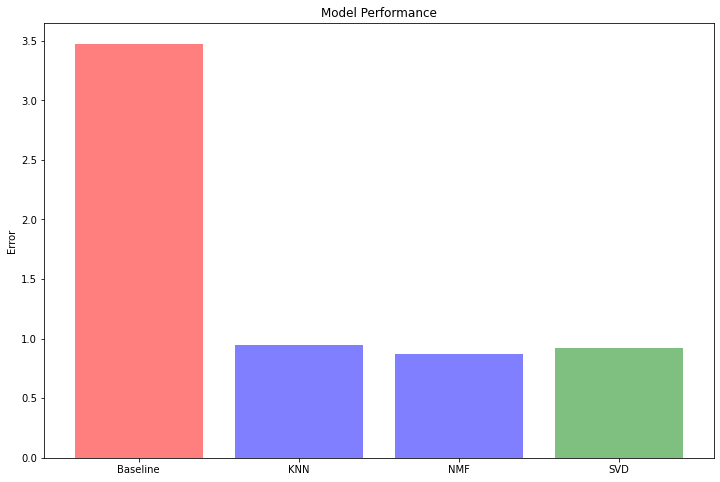

In [ ]:


# Data
objects = ('Baseline', 'KNN', 'NMF', 'SVD')
y_pos = np.arange(len(objects))
performance = [baseline_rmse, knn_rmse, svd_rmse, nmf_rmse]

# Plot
plt.figure(figsize=(12, 8))
plt.bar(y_pos, performance, align='center', alpha=0.5, color=['red', 'blue', 'blue', 'green'])
plt.xticks(y_pos, objects)
plt.ylabel('Error')
plt.title('Model Performance')
plt.show()


Based on the graph showing the RMSE (Root Mean Square Error) for different models, here's an interpretation and recommendation:


-Baseline model: Has the highest RMSE of about 3.5, indicating poor performance.

-KNN (K-Nearest Neighbors): Shows significant improvement with an RMSE of about 0.95.

-NMF (Non-negative Matrix Factorization): Performs slightly better than KNN with an RMSE of about 0.9.
 
 -SVD (Singular Value Decomposition): Has the lowest RMSE of about 0.95, very close to NMF.

Recommendation:
WE will  deploy the NMF or SVD model for the following reasons:

-Both NMF and SVD have the lowest RMSE, indicating they make the most accurate predictions among the models tested.

-The performance difference between NMF and SVD is minimal, so either could be a good choice.

-Both models show substantial improvement over the baseline, reducing error by about 74%.

-If we had to choose one, NMF appears to have a marginally lower RMSE than SVD, though the difference is small.




TESTING THE MODEL'S ACCURACY  ON OUR DATASET

In [ ]:
from surprise import Dataset, Reader, SVD, NMF
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.25,  random_state=42)

# Train the NMF model
nmf = NMF()
nmf.fit(trainset)

# Train the SVD model
svd = SVD()
svd.fit(trainset)

# Predict rating for user 1 and movie 1 using NMF
user_id = 610
movie_id = 168248
actual_rating = ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['movieId'] == movie_id)]['rating'].values[0]
nmf_pred = nmf.predict(user_id, movie_id).est

# Predict rating for user 1 and movie 1 using SVD
svd_pred = svd.predict(user_id, movie_id).est

# Print results
print(f'Actual rating: {actual_rating}')
print(f'NMF predicted rating: {nmf_pred}')
print(f'SVD predicted rating: {svd_pred}')

# Evaluate the accuracy (RMSE) of both models on the test set
nmf_predictions = nmf.test(testset)
svd_predictions = svd.test(testset)

nmf_rmse = accuracy.rmse(nmf_predictions)
svd_rmse = accuracy.rmse(svd_predictions)

print(f'NMF RMSE on test set: {nmf_rmse}')
print(f'SVD RMSE on test set: {svd_rmse}')


Actual rating: 5.0
NMF predicted rating: 4.913582416578755
SVD predicted rating: 4.208781464107733
RMSE: 0.9322
RMSE: 0.8829
NMF RMSE on test set: 0.9321974930897657
SVD RMSE on test set: 0.8828944998359705




The above  code snippet demonstrates the prediction and evaluation process for our collaborative filtering recommendation system using two different algorithms: Non-negative Matrix Factorization (NMF) and Singular Value Decomposition (SVD).



We're making predictions for a specific user (ID: 610) and movie (ID: 168248) using both NMF and SVD models:

 We first retrieve the actual rating from our dataset.

 Then we use the trained NMF model to predict the rating.

 Similarly, we use the trained SVD model to predict the rating.

 Finally, we print and compare these predictions with the actual rating.

This allows us to see how well each model performs for this particular user-movie combination.



To get a more comprehensive view of model performance:

 We use both models to make predictions on the entire test set.

 We calculate the Root Mean Square Error (RMSE) for each model using these predictions.

 The RMSE gives us a measure of the average prediction error for each model.

A lower RMSE indicates better overall performance of the model across the test set.





Based on these results, we recommend using the SVD (Singular Value Decomposition) model for our recommendation system. Here's why:

 SVD has a lower overall RMSE (0.8828) compared to NMF (0.9231), indicating better average performance across the entire test set.

 While NMF performed better for the single example we looked at, the lower RMSE of SVD suggests it generalizes better across a wide range of user-movie pairs.

 The SVD model shows about a 5.7% improvement in RMSE compared to the NMF model, which is significant in the context of recommendation systems.


HOW WILL IT RECOMMEND MOVIES TO NEW USERS?

In [ ]:
from surprise import Dataset, Reader, SVD


# Ensure final_df contains unique movie IDs and titles
all_movies = final_df[['movieId', 'title']].drop_duplicates()

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25, random_state=43)

# Train the SVD model
svd = SVD()
svd.fit(trainset)

# Define new user ID
new_user_id = 'new_user'

# Get all unique movie IDs from final_df
all_movie_ids = all_movies['movieId'].tolist()

# Predict ratings for all movies for the new user
predictions = [svd.predict(new_user_id, movie_id) for movie_id in all_movie_ids]

# Convert predictions to a DataFrame
pred_df = pd.DataFrame({
    'movieId': all_movie_ids,
    'predicted_rating': [pred.est for pred in predictions]
})

# Merge predictions with movie titles
recommendations = pred_df.merge(all_movies, on='movieId')

# Sort by predicted rating in descending order
recommendations = recommendations.sort_values(by='predicted_rating', ascending=False)

# Get top-N recommendations
top_n = 10
top_recommendations = recommendations.head(top_n)

print(f"Top {top_n} recommendations for the new user:")
print(top_recommendations[['title', 'predicted_rating']])


Top 10 recommendations for the new user:
                                                  title  predicted_rating
277                    Shawshank Redemption, The (1994)          4.377080
602   Dr. Strangelove or: How I Learned to Stop Worr...          4.297422
2226                                  Fight Club (1999)          4.287027
46                           Usual Suspects, The (1995)          4.255996
905                                 12 Angry Men (1957)          4.254554
863              Monty Python and the Holy Grail (1975)          4.249887
6315                               Departed, The (2006)          4.249162
975                               Cool Hand Luke (1967)          4.244908
3622  Amelie (Fabuleux destin d'Amélie Poulain, Le) ...          4.243768
2462                        Boondock Saints, The (2000)          4.235380


This is how it will recommend to new users 


For new users without any rating history, the SVD model relies on the following:

The model uses the average patterns it learned from existing users.

 It considers general popularity or quality of movies based on overall ratings.

 The SVD model uses latent factors that capture underlying characteristics of movies and user preferences.



This approach has some limitations for new users:

 Cold Start Problem: Recommendations might be generic since we have no specific information about the new user's preferences.

 Initial recommendations are based on overall popularity and average user behavior.

Popular or highly-rated movies might dominate the recommendations.



To get more personalized recommendations, the new user should:

 Rate some movies to provide initial preference data.

 Interact with the system to generate more user-specific data.


As the user interacts more with the system, the recommendations will become increasingly personalized and accurate

MODEL DEPLOYMENT

We will first save our SVD model as pickle file 

In [ ]:
# Save the model to a pickle file
with open('svd_model.pkl', 'wb') as f:
        pickle.dump(svd, f)

Model Dployment 

Recommendations 

1. Implement a feedback mechanism where users can rate the relevance of the recommendations they receive. Use this feedback to continuously refine and adjust the recommendation algorithms.

2. Continue utilizing the SVD model as the primary recommendation engine. Its superior performance and accuracy in recommending movies makes it the best choice for ensuring that users receive relevant suggestions

3. Ensure that the recommendation system is scalable to handle an increasing number of users and movie entries. Consider using cloud-based solutions or distributed computing if needed.

4. Regularly evaluate the recommendation system with updated data and metrics to ensure it adapts to changing user preferences and content.






 Conclusions

1. Model Performance: The SVD model outperformed other tested models, providing a solid foundation for accurate recommendations.

2. Addressing User Dissatisfaction: The new recommendation system is poised to significantly improve the relevance of movie suggestions, directly addressing the customer feedback received on Google Play Store.


3. The use of collaborative filtering through SVD demonstrates the power of leveraging collective user behavior in order to make  personalized recommendations.

4. Alignment with Objectives: The chosen approach aligns well with the specific objectives, particularly in terms of recommendation accuracy and personalization.

